In [67]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [68]:
# importing the dataset
d = pd.read_csv('student_data1.csv')
d

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,no
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,yes,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,no
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,yes
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,yes
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,no,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,...,yes,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,yes
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,...,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,no
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,yes,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,yes
394,MS,M,19.0,U,LE3,T,1.0,1.0,other,at_home,...,yes,no,3.0,2.0,3.0,3.0,3.0,5.0,5.0,no


In [69]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      396 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    float64
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [70]:
d['passed'].unique()

array(['no', 'yes', nan], dtype=object)

In [71]:
d.dropna(axis=0, inplace=True)
d.shape

(395, 31)

In [72]:
d['passed'].unique()

array(['no', 'yes'], dtype=object)

In [73]:
d.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [74]:
# to take numeric columns from dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = d.select_dtypes(include=numerics)
numcols = newdf.columns
print(numcols)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')


## Univariate Analysis ##

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'Medu'}>,
        <AxesSubplot: title={'center': 'Fedu'}>,
        <AxesSubplot: title={'center': 'traveltime'}>],
       [<AxesSubplot: title={'center': 'studytime'}>,
        <AxesSubplot: title={'center': 'failures'}>,
        <AxesSubplot: title={'center': 'famrel'}>,
        <AxesSubplot: title={'center': 'freetime'}>],
       [<AxesSubplot: title={'center': 'goout'}>,
        <AxesSubplot: title={'center': 'Dalc'}>,
        <AxesSubplot: title={'center': 'Walc'}>,
        <AxesSubplot: title={'center': 'health'}>],
       [<AxesSubplot: title={'center': 'absences'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

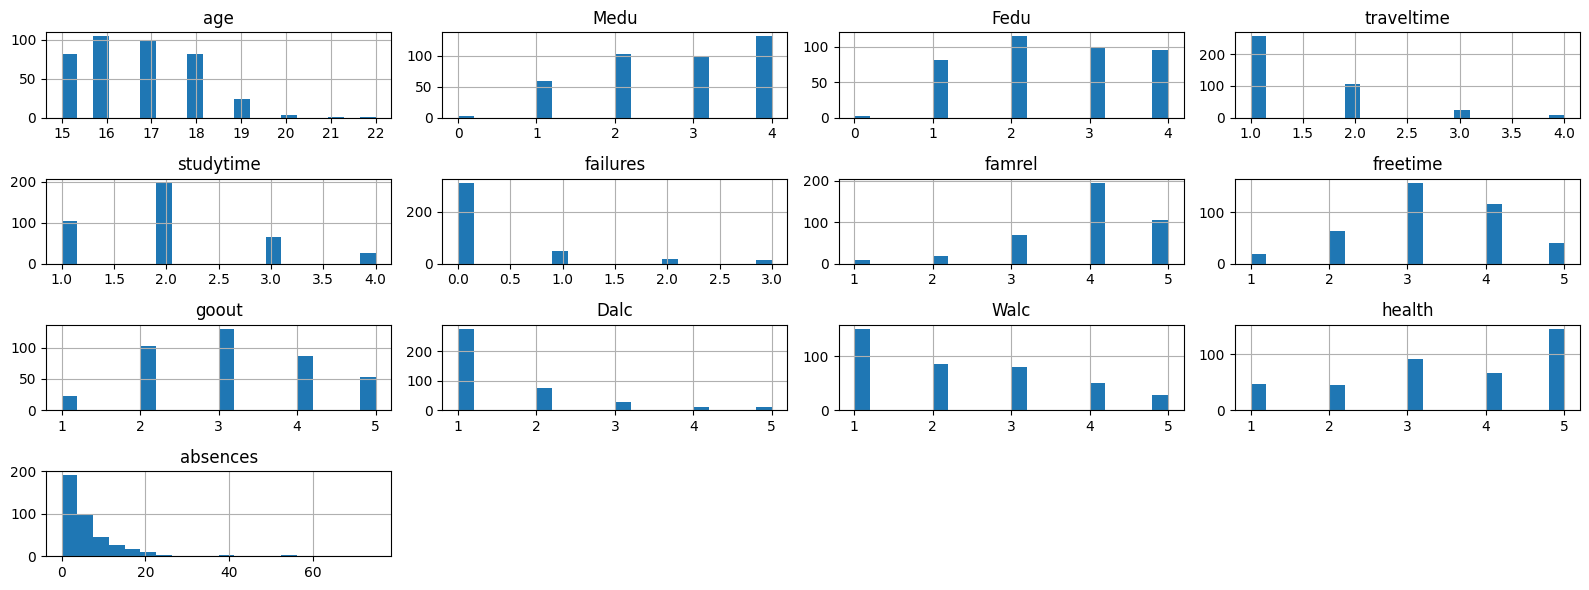

In [75]:
newdf.hist(
 bins=20, figsize=(16, 6))

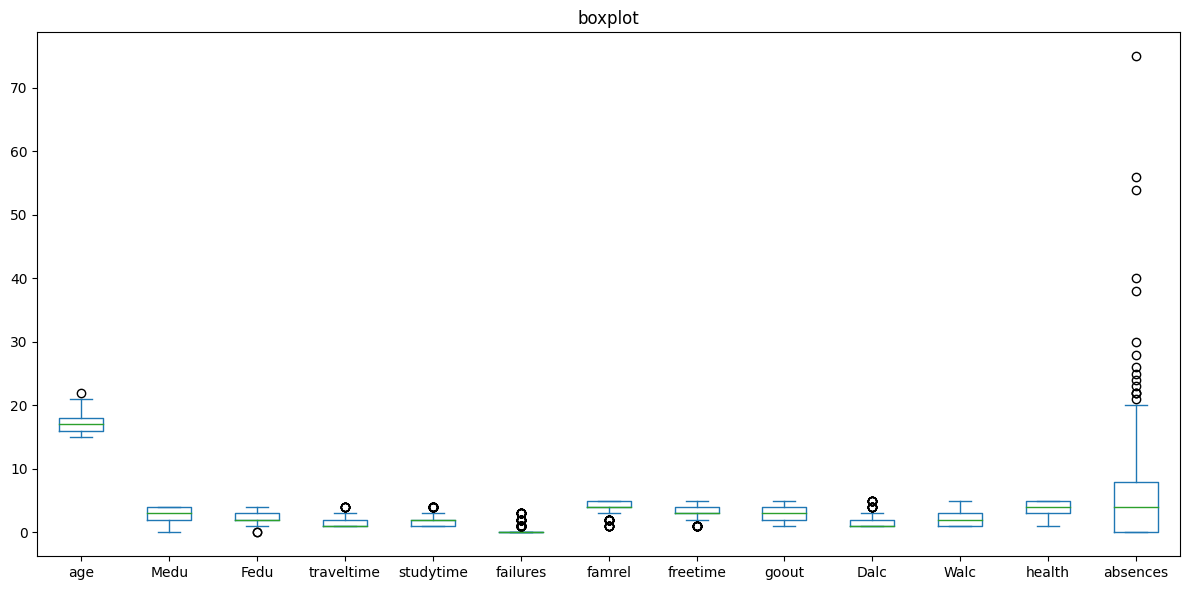

In [76]:
# Set the figure size
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = newdf.plot(kind='box', title='boxplot')

# Display the plot
plt.show()

<AxesSubplot: ylabel='sex'>

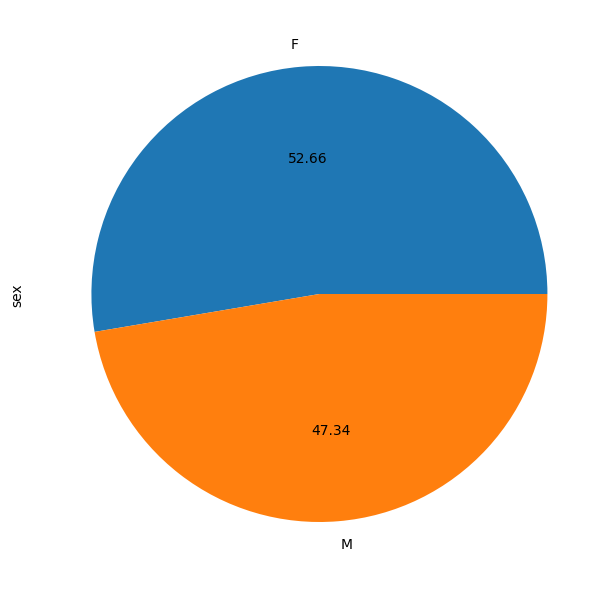

In [170]:

d['sex'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
d['sex'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot: ylabel='famsize'>

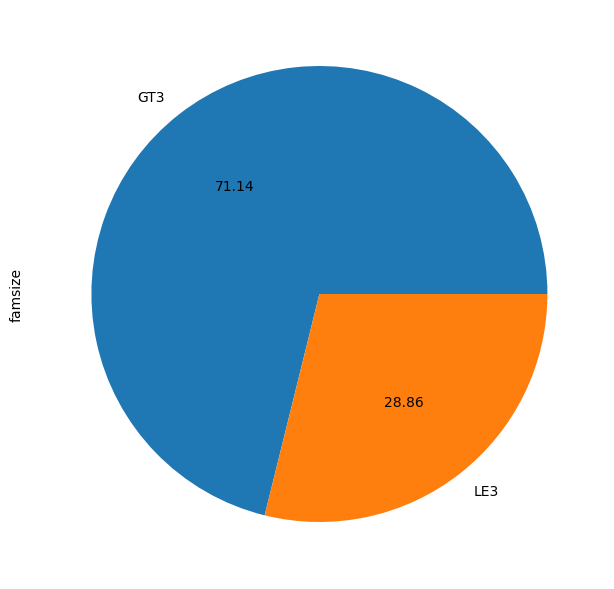

In [172]:
d['famsize'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot: ylabel='Pstatus'>

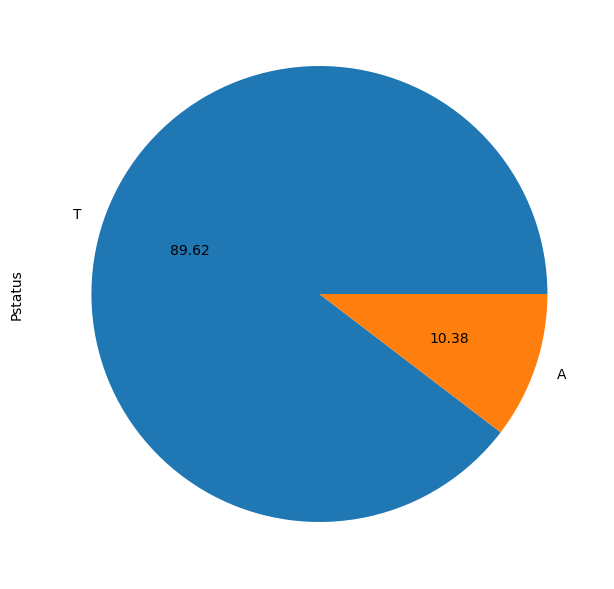

In [173]:
d['Pstatus'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot: >

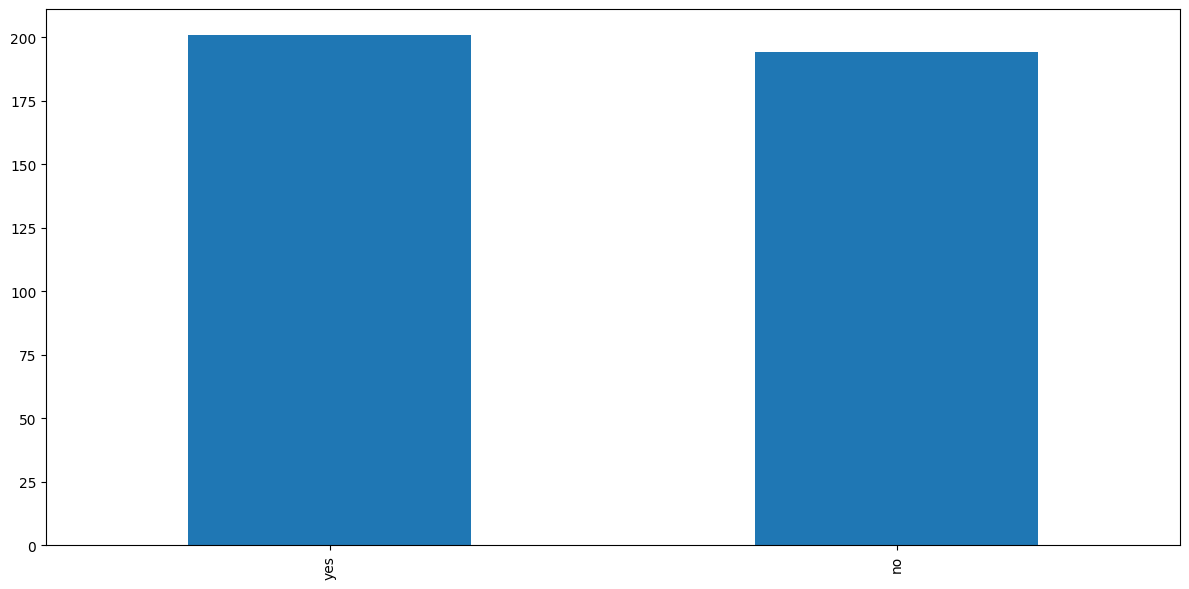

In [176]:

d['activities'].value_counts().plot(kind='bar')

## Multivariate Analysis ##

C:\Users\hp\AppData\Local\Temp\ipykernel_10692\3179416044.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(d.corr(), annot=True, cmap=sns.cubehelix_palette(rot=-.4))


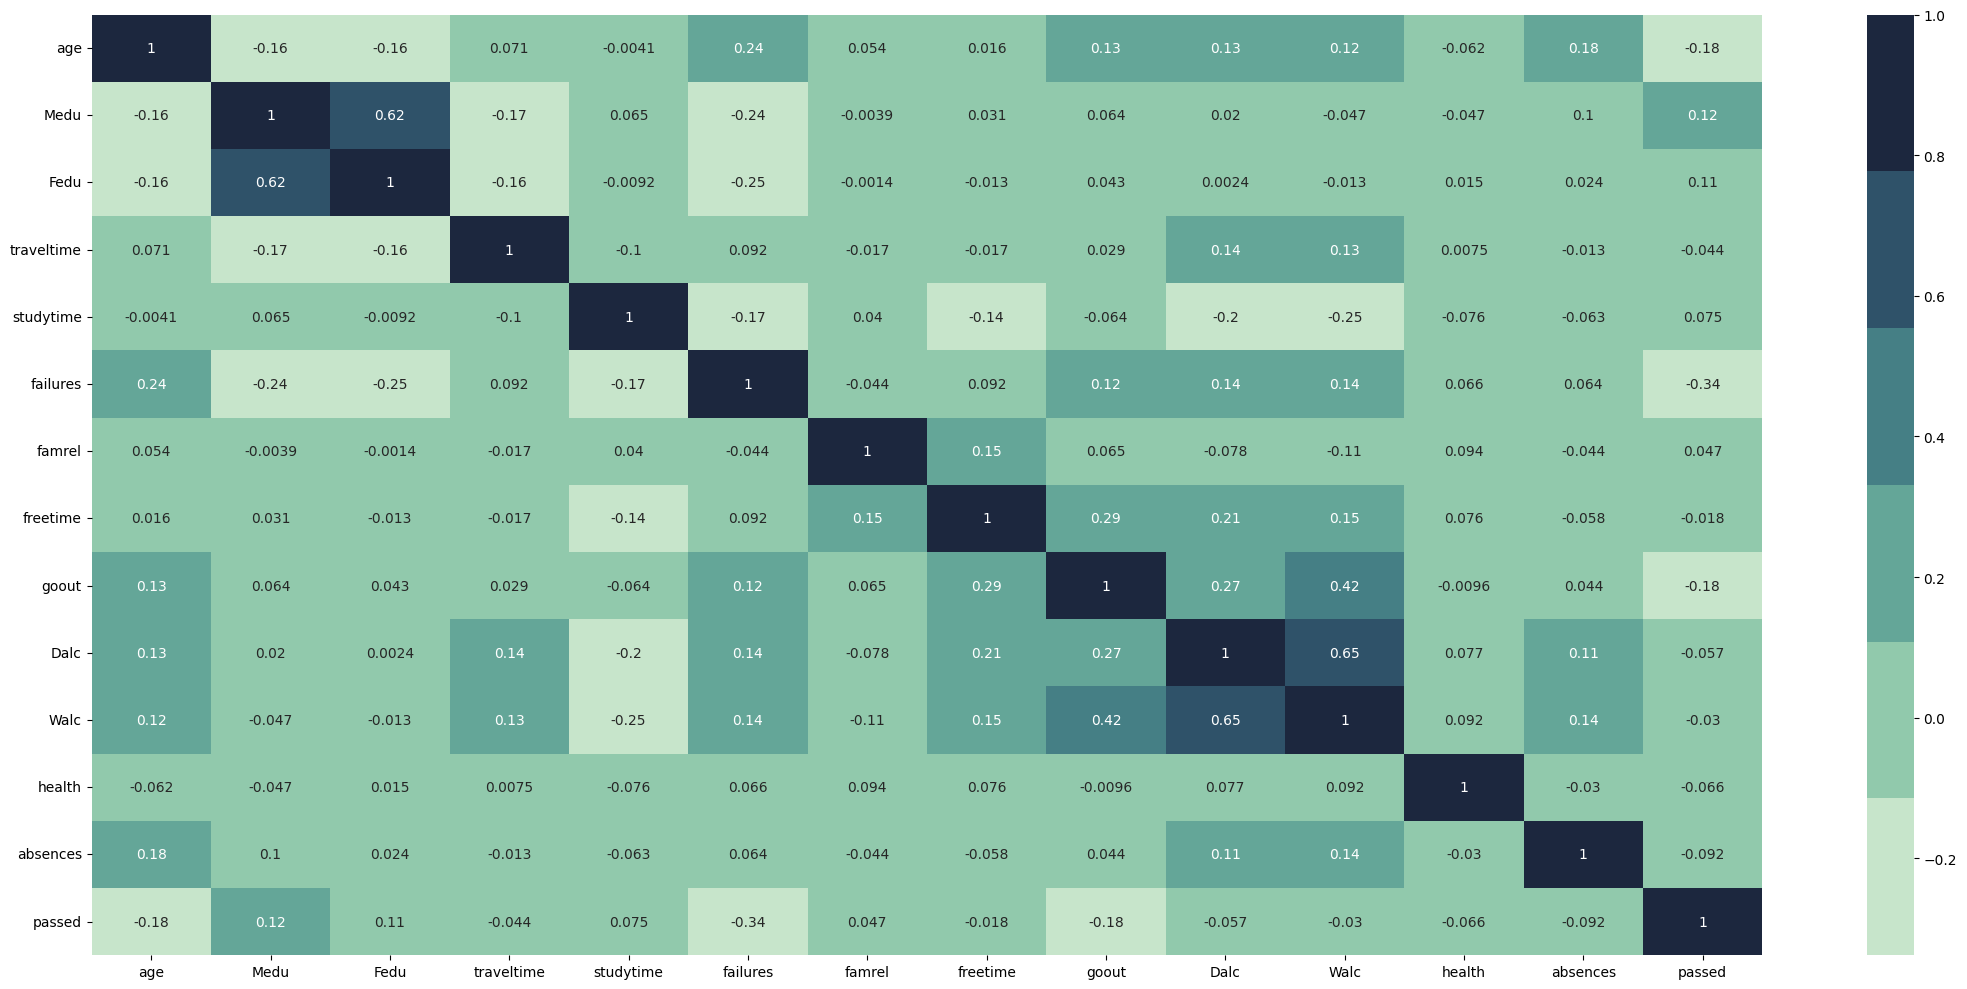

In [155]:
fig = plt.figure(figsize=[22,10])
    
sns.heatmap(d.corr(), annot=True, cmap=sns.cubehelix_palette(rot=-.4))

plt.show()

Features Correlation with the status of student

C:\Users\hp\AppData\Local\Temp\ipykernel_10692\2045062649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(d.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


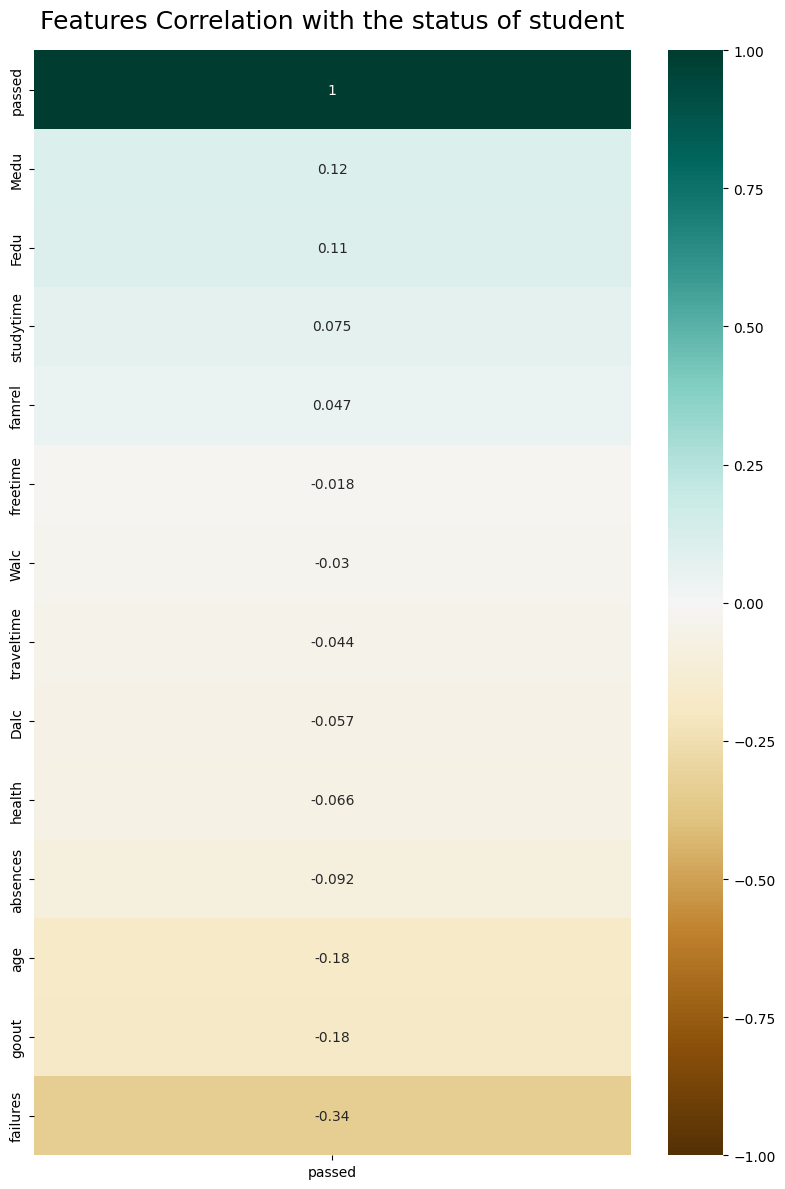

In [154]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(d.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlation with the status of student', fontdict={'fontsize':18}, pad=16);

*Conclusions*<br>
Based on this heatmap we can do a quick conclusion about most impactfull features on student status:<br>

Three most impactful (positive) features:<br>

-Mother and father with high education had a positive impact on student performance<br>

-The students who want to take higher education are having good grades<br>

Three most impactful (negative) features:

-Going out with friends to much hours can have a bad impact on studies<br>

-Age and failures are other features that also impact negatively to the student performances.

Insight about Parent's education significance in grades

In [156]:
d['passed'].value_counts()

1    265
0    130
Name: passed, dtype: int64

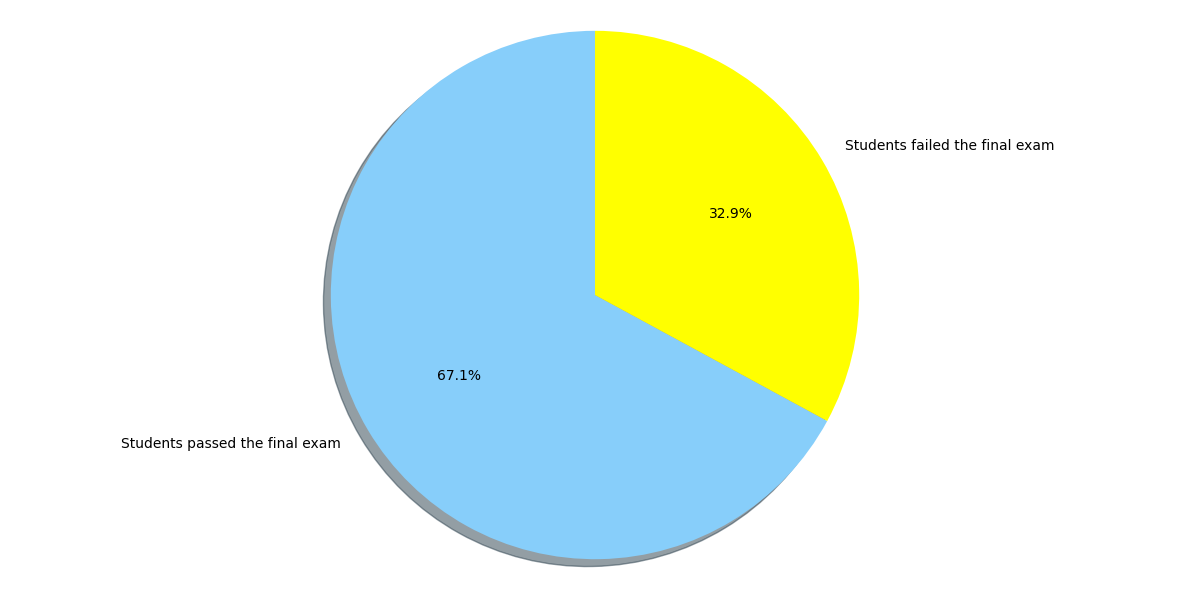

In [157]:
labels = 'Students passed the final exam ', 'Students failed the final exam'
sizes = [265, 130]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0, 0.5, 'Passed')

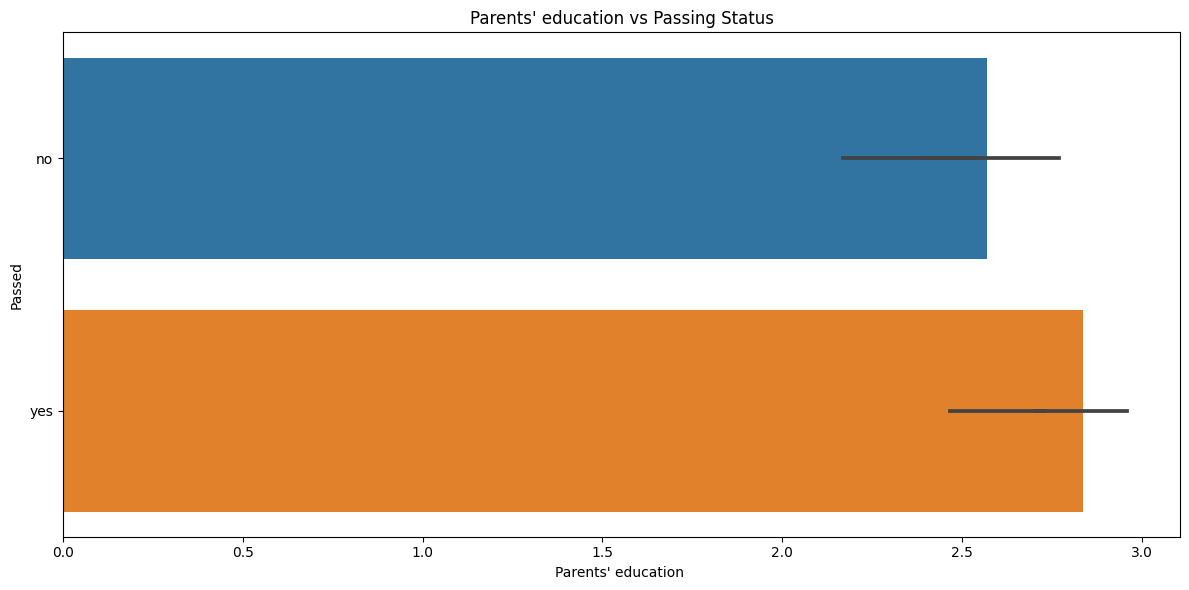

In [83]:
sns.barplot(data=d,x='Medu',y='passed')
sns.barplot(data=d,x='Fedu',y='passed')
plt.title("Parents' education vs Passing Status")
plt.xlabel("Parents' education ")
plt.ylabel("Passed")

In [94]:
le = LabelEncoder()
d['passed']= le.fit_transform(d['passed'].astype('str'))

Text(0.5, 0, 'Student status')

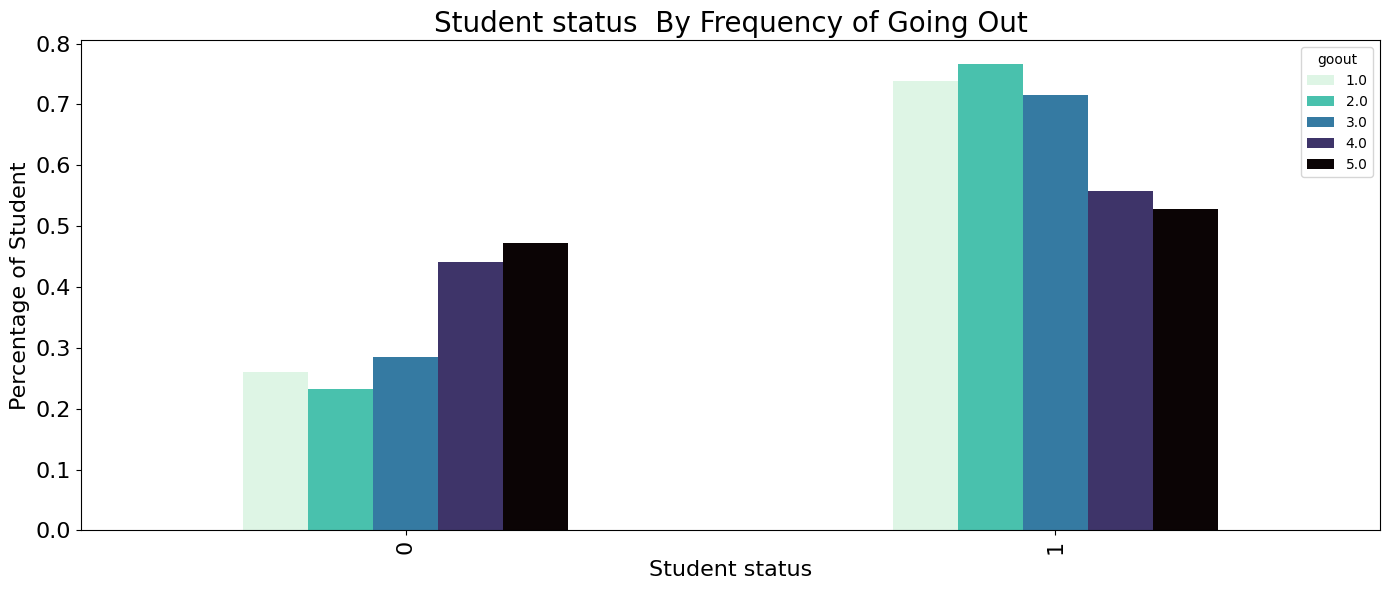

In [151]:
# going out
perc = (lambda col: col/col.sum())
index = [0,1]
out_tab = pd.crosstab(index=d.passed, columns=d.goout)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Student status  By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Student status', fontsize=16)

Conclusion:Tt seems that most of people who passed the exam had less hour of going out.

Insight about Parent's Profession significance in grades

In [119]:
d['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

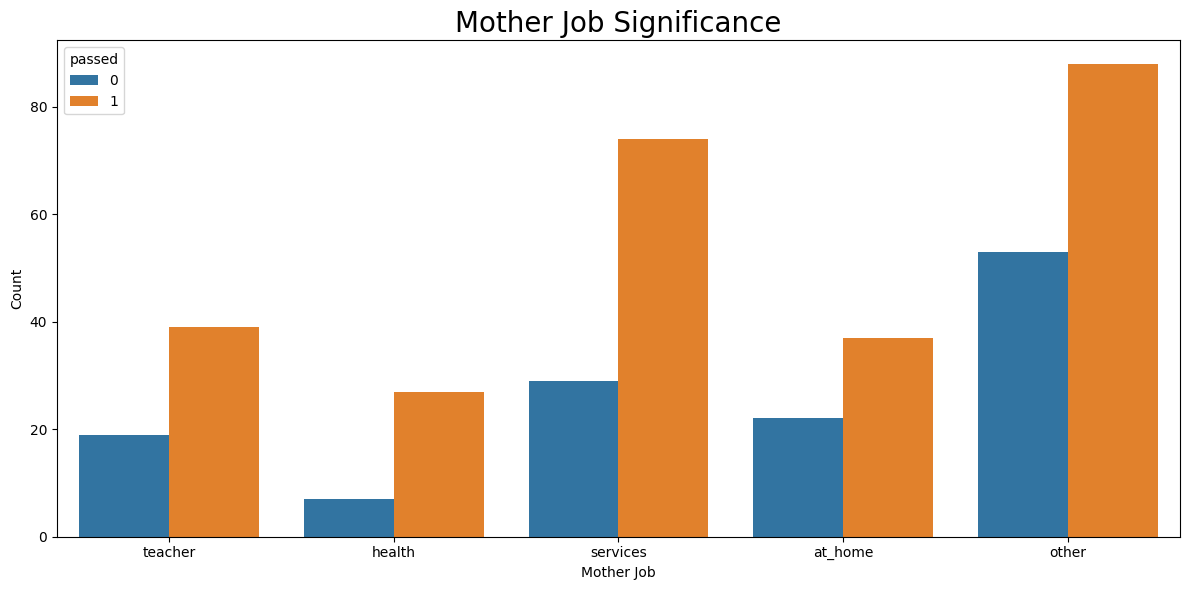

In [139]:
# Mjob distribution
f, fx = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=d, order=['teacher','health','services','at_home','other'], hue='passed')
fx = fx.set(ylabel="Count", xlabel="Mother Job")
plt.title('Mother Job Significance', fontsize=20)
figure.grid(False)

Conclusion: It's seems that students who's mother work as other than teacher,doctor and at home reach good status.

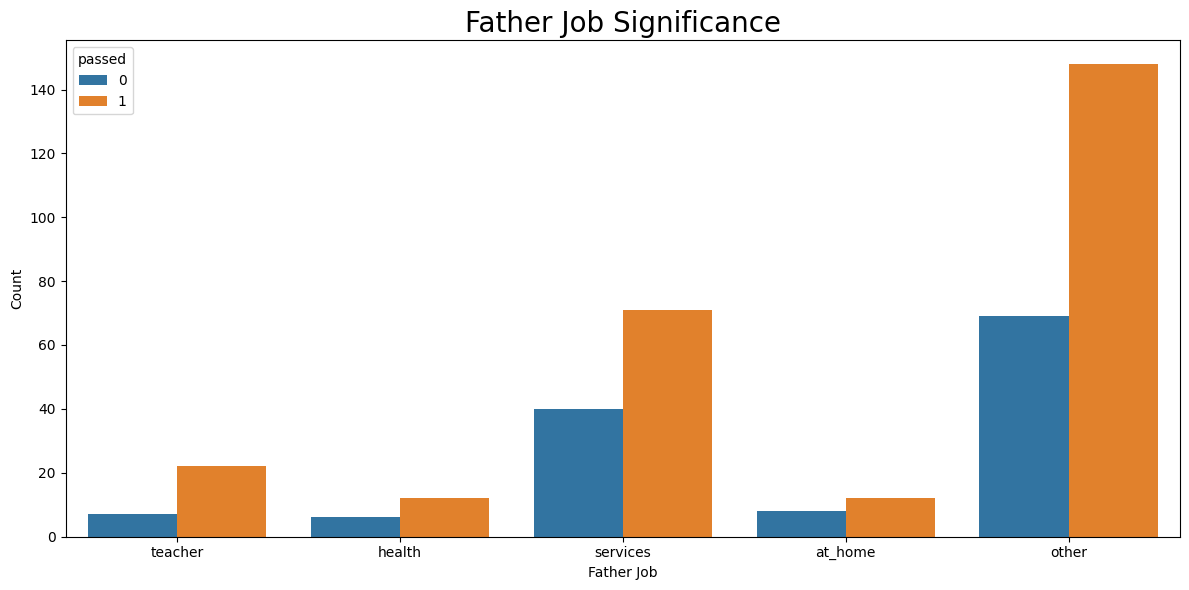

In [138]:
# Fjob distribution
f, fx = plt.subplots()
figure = sns.countplot(x = 'Fjob', data=d, order=['teacher','health','services','at_home','other'], hue='passed')
fx = fx.set(ylabel="Count", xlabel="Father Job")
plt.title('Father Job Significance', fontsize=20)
figure.grid(False)

Conclusion: It's seems that students who's father work as other than teacher,doctor and at home reach good status.

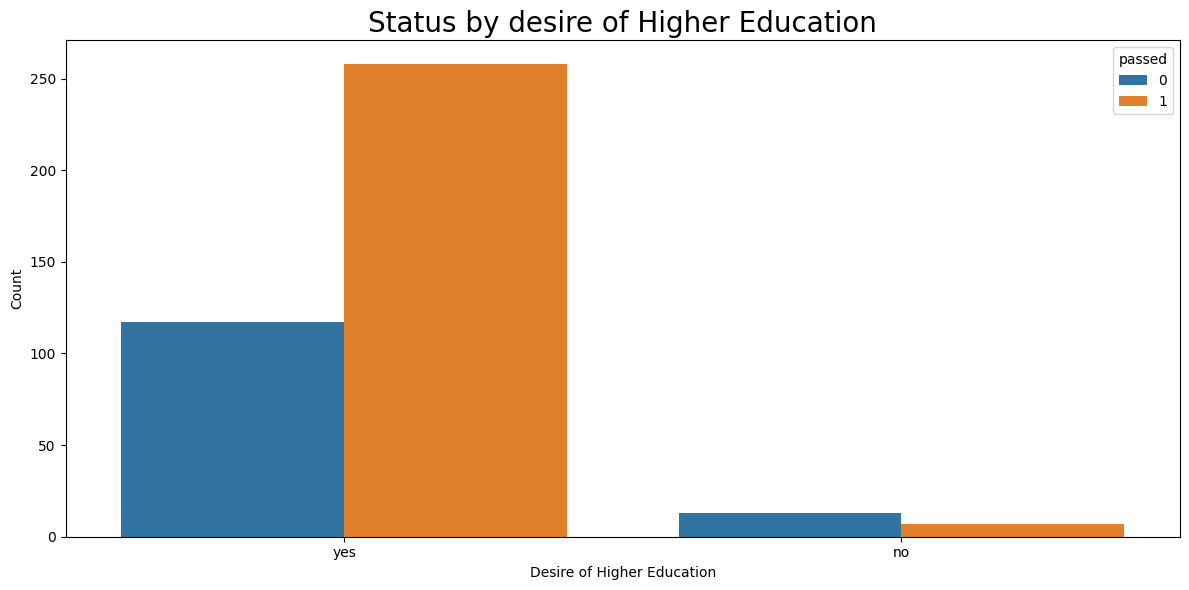

In [137]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'higher', data=d, order=['yes','no'], hue='passed')
fx = fx.set(ylabel="Count", xlabel="Desire of Higher Education")
plt.title('Status by desire of Higher Education', fontsize=20)
figure.grid(False)

Conclusion:Most of people who passed the exam want to take heigher education sow it could be a good idea to encourage your kids or students to take heigher education.

Text(0, 0.5, 'Percentage of Student')

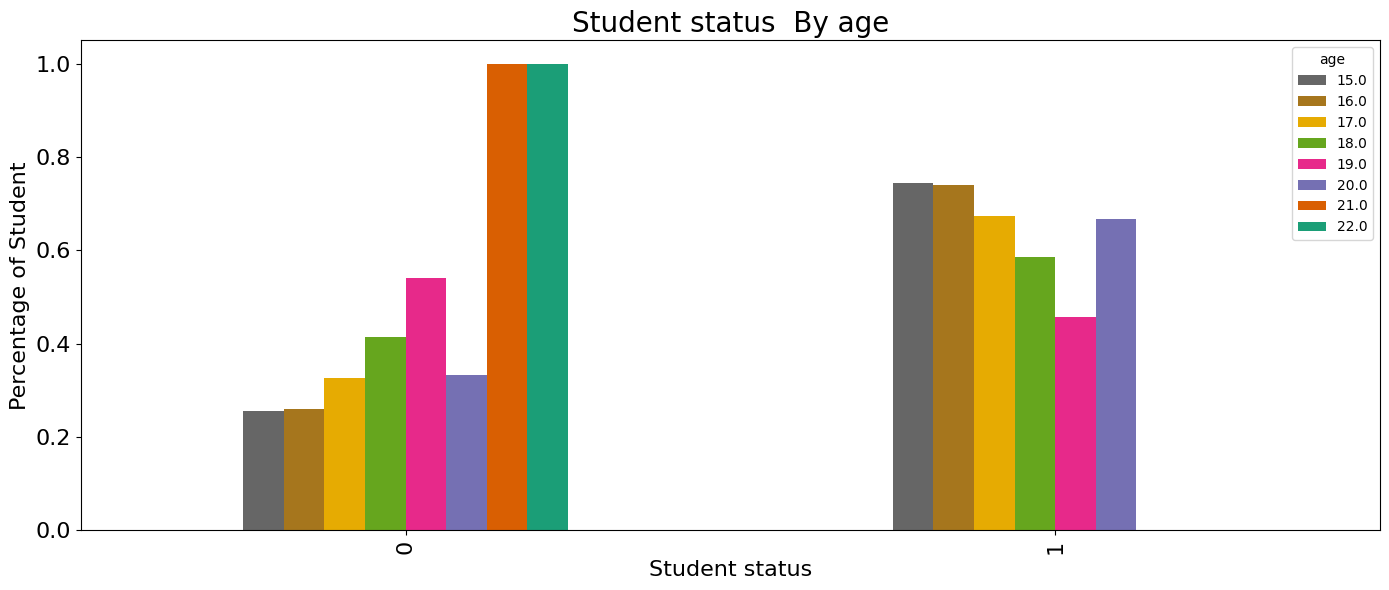

In [125]:
#impact of age
higher_tab = pd.crosstab(index=d.passed, columns=d.age)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Student status  By age', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

Conclusion:Age also play an importent role in student sucess, most of people who passed the exam had early age 15, and most people who failed the exam had an age of 22. As a conclusion it could be better to go to school in early age.

<Figure size 1200x600 with 0 Axes>

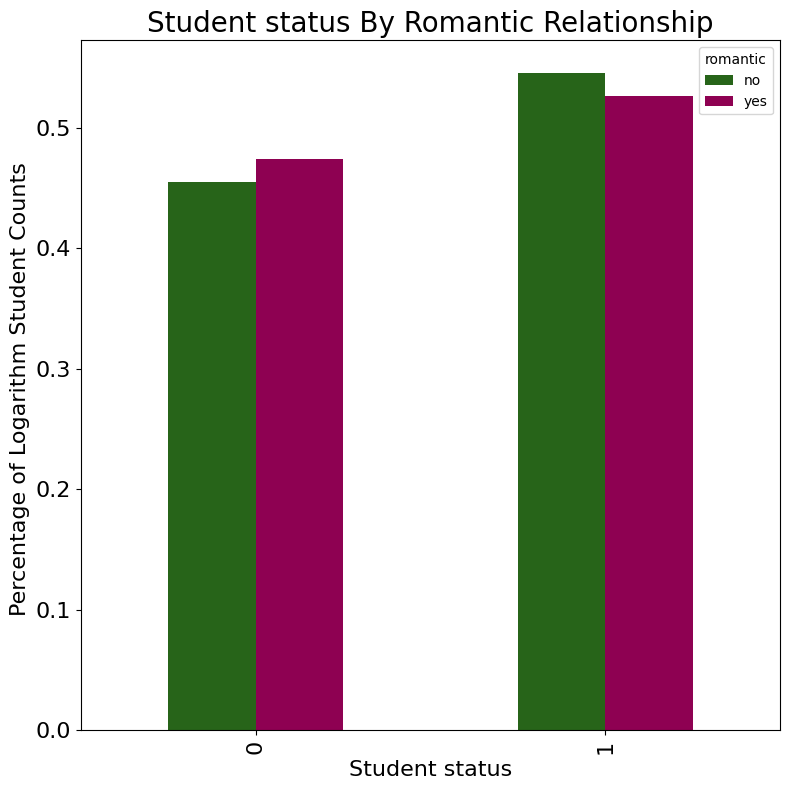

In [145]:

romance_tab1 = pd.crosstab(index=d.passed, columns=d.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Student status By Romantic Relationship', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.show()
# 0 in romantic mean no romantic relation

Conclusion:
Most of people who passed the exam had no romantic relation ,so no relation could be a good choice for better performance.

Text(0, 0.5, 'Percentage of Student')

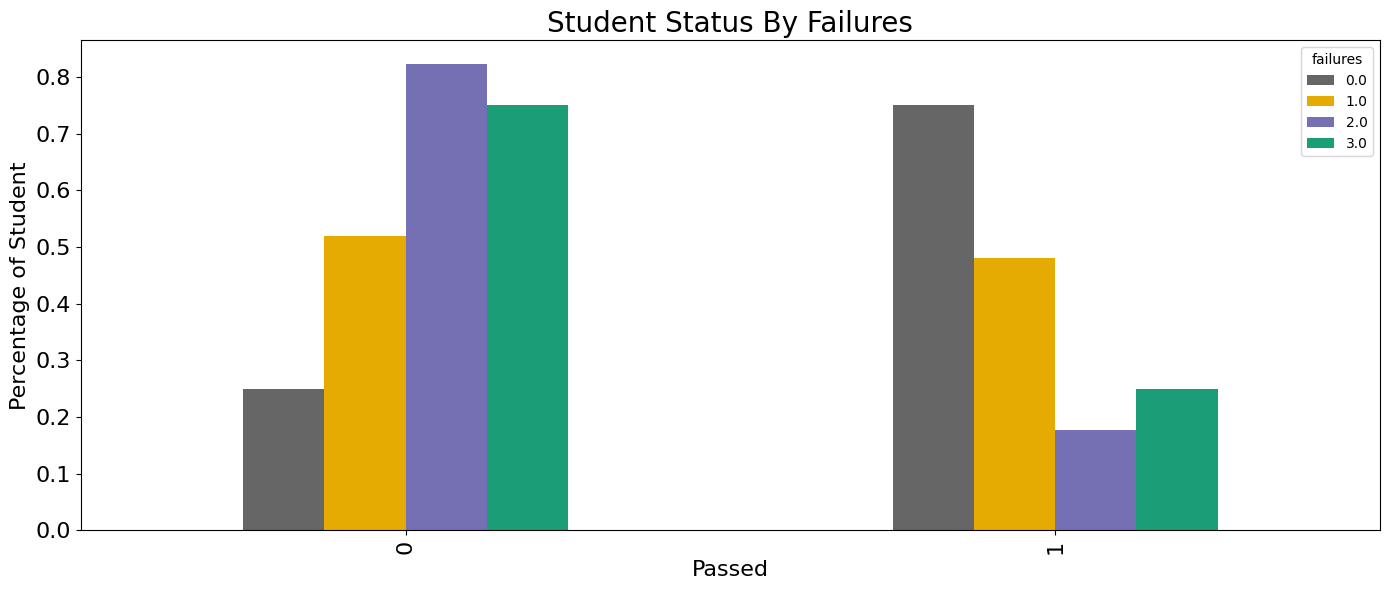

In [134]:
fail_tab = pd.crosstab(index=d.passed, columns=d.failures)
fail_perc = fail_tab.apply(perc).reindex(index)
fail_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Student Status By Failures', fontsize=20)
plt.xlabel('Passed', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)



Conclusion:Most of people who passed the exam had 0 failures.

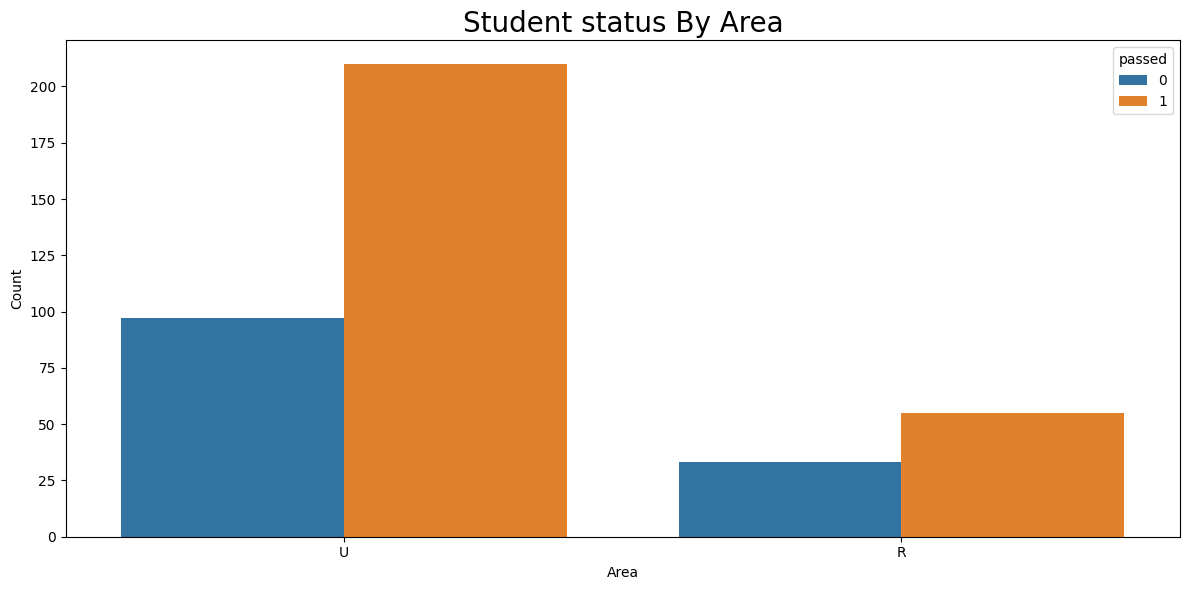

In [144]:


f, fx = plt.subplots()
figure = sns.countplot(x = 'address', data=d, order=['U','R'], hue='passed')
fx = fx.set(ylabel="Count", xlabel="Area")
plt.title('Student status By Area', fontsize=20)
figure.grid(False)

Conclusion: Students living in urban areas showed good performance.

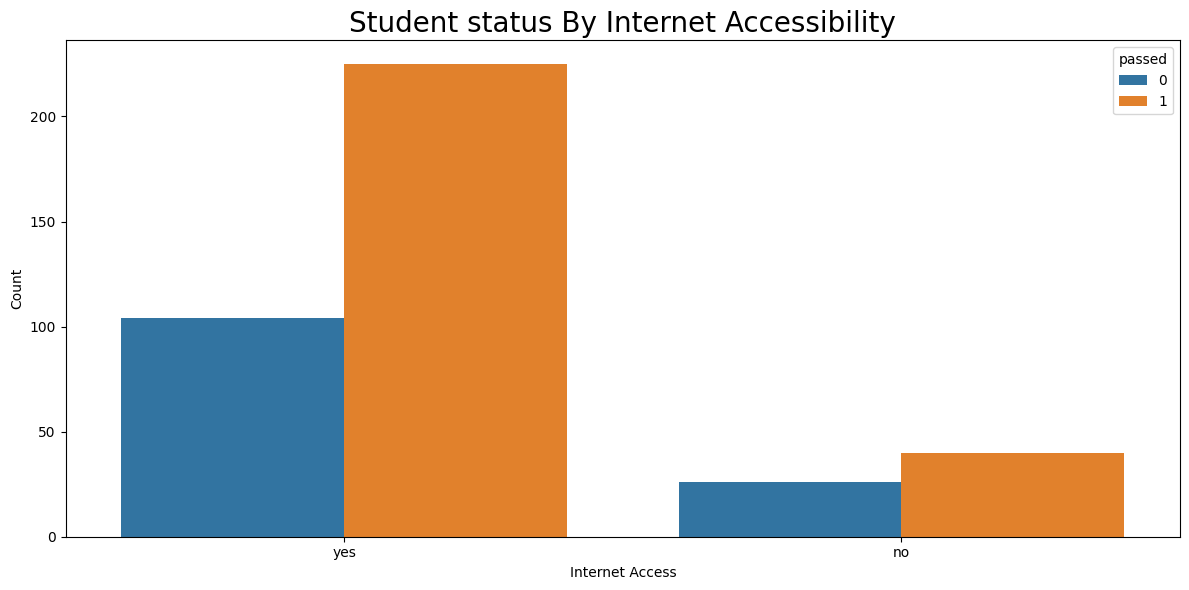

In [146]:
f, fx = plt.subplots()
figure = sns.countplot(x = 'internet', data=d, order=['yes','no'], hue='passed')
fx = fx.set(ylabel="Count", xlabel="Internet Access")
plt.title('Student status By Internet Accessibility', fontsize=20)
figure.grid(False)

Conclusion: Most of people who passed the exam had the accessibility to internet.

Text(0, 0.5, 'Percentage of Student')

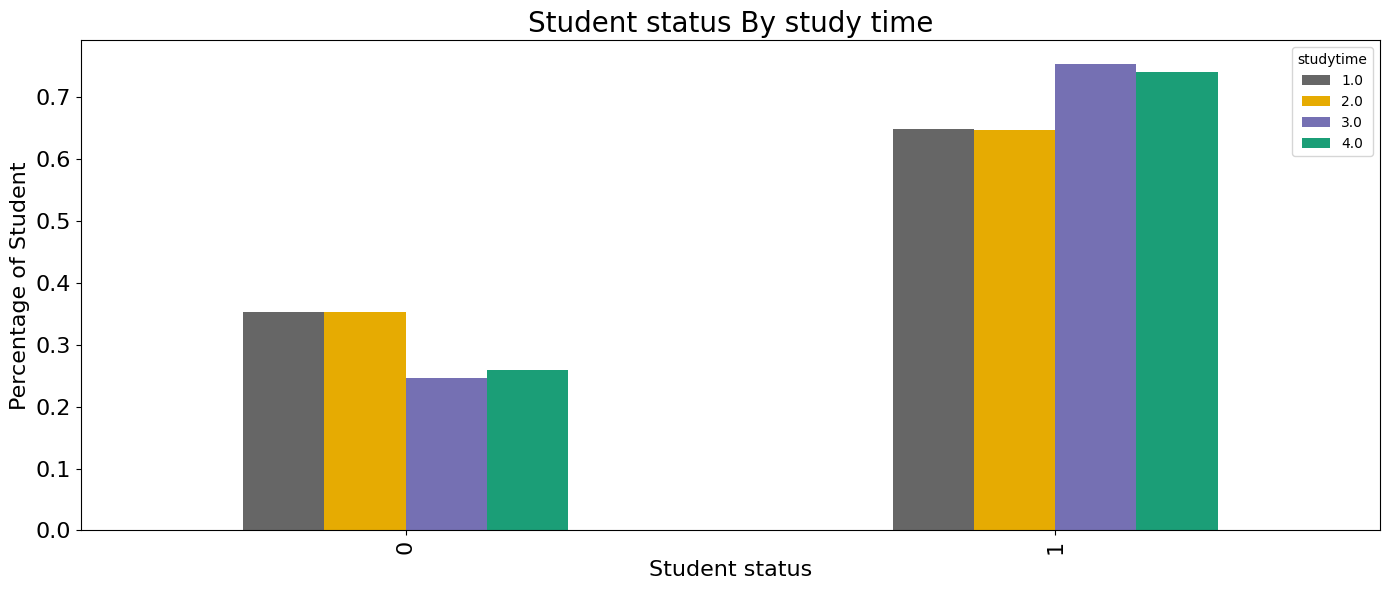

In [152]:
stu_tab = pd.crosstab(index=d.passed, columns=d.studytime)
stu_perc = stu_tab.apply(perc).reindex(index)
stu_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Student status By study time', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

Conclusion:Most of people who passed the exam study 5-10 hours weekly.

Text(0, 0.5, 'Percentage of Student')

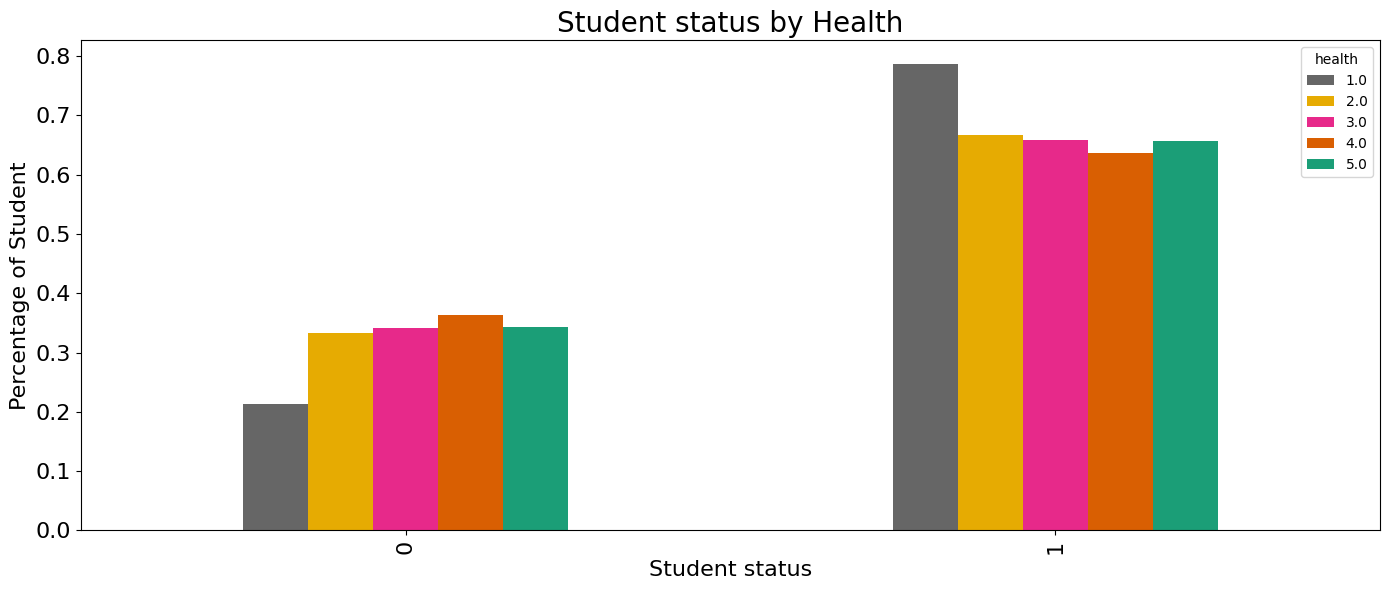

In [150]:
he_tab = pd.crosstab(index=d.passed, columns=d.health)
he_perc = he_tab.apply(perc).reindex(index)
he_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Student status by Health', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

Conclusion:Most of students who fail the exam don't have a good health.

In [14]:
#sns.pairplot(d)

## Feature Engineering ##

In [17]:

#ohe = OneHotEncoder(drop='first',sparse=False)
#arr= ohe.fit_transform(df[["school","address","famsize","Pstatus","Mjob","Fjob","reason","guardian", 'schoolsup','activities', 'higher', 'internet', 'famsup', 'paid', 'activities', 'nursery','romantic']].astype('str'))
#df1 = pd.DataFrame(arr, columns = ["school","address","famsize","Pstatus","Mjob","Fjob","reason","guardian", 'schoolsup','activities', 'higher', 'internet', 'famsup', 'paid', 'activities', 'nursery','romantic'])
df1= pd.get_dummies(data=d,drop_first=True)
df1.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,passed_yes
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,...,0,1,0,0,0,1,1,0,0,0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,...,0,0,1,0,0,0,1,1,0,0
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,...,0,1,0,1,0,1,1,1,0,1
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,...,0,0,1,1,1,1,1,1,1,1
4,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,...,0,0,1,1,0,1,1,0,0,1


In [18]:
d['Pstatus'].unique()

array(['A', 'T'], dtype=object)

In [19]:
df1.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes', 'passed_yes'],
      dtype='object')

In [20]:
le = LabelEncoder()
d['passed']= le.fit_transform(d['passed'].astype('str'))

In [21]:
df1['Passed']=d['passed']
df1

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,passed_yes,Passed
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,...,1,0,0,0,1,1,0,0,0,0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,...,0,1,0,0,0,1,1,0,0,0
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,...,1,0,1,0,1,1,1,0,1,1
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,...,0,1,1,1,1,1,1,1,1,1
4,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,...,0,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,...,0,1,1,0,1,1,0,0,0,0
391,17.0,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,3.0,...,0,0,0,0,0,1,1,0,1,1
392,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,3.0,...,0,0,0,0,0,1,1,0,1,1


In [22]:
df1.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes', 'passed_yes', 'Passed'],
      dtype='object')

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                395 non-null    float64
 1   Medu               395 non-null    float64
 2   Fedu               395 non-null    float64
 3   traveltime         395 non-null    float64
 4   studytime          395 non-null    float64
 5   failures           395 non-null    float64
 6   famrel             395 non-null    float64
 7   freetime           395 non-null    float64
 8   goout              395 non-null    float64
 9   Dalc               395 non-null    float64
 10  Walc               395 non-null    float64
 11  health             395 non-null    float64
 12  absences           395 non-null    float64
 13  school_MS          395 non-null    uint8  
 14  sex_M              395 non-null    uint8  
 15  address_U          395 non-null    uint8  
 16  famsize_LE3        395 non

In [24]:
df1

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,passed_yes,Passed
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,...,1,0,0,0,1,1,0,0,0,0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,...,0,1,0,0,0,1,1,0,0,0
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,...,1,0,1,0,1,1,1,0,1,1
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,...,0,1,1,1,1,1,1,1,1,1
4,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,...,0,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,...,0,1,1,0,1,1,0,0,0,0
391,17.0,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,3.0,...,0,0,0,0,0,1,1,0,1,1
392,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,3.0,...,0,0,0,0,0,1,1,0,1,1


## Outlier Removal ##

In [25]:
df1[df1['absences']>(df1['absences'].mean()+3*df1['absences'].std())]=(df1['absences']<(df1['absences'].mean()+3*df1['absences'].std())).median()
df1.shape
# show plot
#plt.show()

(395, 41)

In [93]:
d['age'].max()

22.0

In [126]:
variance_vector = df1.var()
variance_vector 

age                   5.282915
Fedu                  1.204935
traveltime            0.485665
studytime             0.712678
failures              0.556281
famrel                0.930823
freetime              1.039491
goout                 1.287837
Dalc                  0.793073
health                1.996697
absences             32.205269
sex_M                 0.250363
address_U             0.170751
famsize_LE3           0.210024
Pstatus_T             0.089212
Mjob_health           0.091242
Mjob_other            0.231549
Mjob_services         0.199165
Mjob_teacher          0.134396
Fjob_health           0.057213
Fjob_other            0.247382
Fjob_services         0.205834
Fjob_teacher          0.080961
reason_home           0.203663
reason_other          0.095264
reason_reputation     0.199165
guardian_mother       0.212041
guardian_other        0.083043
schoolsup_yes         0.121982
famsup_yes            0.236137
paid_yes              0.249463
activities_yes        0.250363
nursery_

## Removing Correlated columns<br>
Fedu and Medu => so i chose to delete Medu<br>
Walc and Dalc => i chose to drop Walc because drinking in workday has more impact than week end<br>
School and age => so i chose to delete school

In [30]:
df1.drop(['Medu', 'Walc', 'school_MS'],axis='columns', inplace=True)

In [31]:
df1.shape

(395, 38)

## Model Creation ##

In [32]:
X_train,X_test,y_train,y_test = train_test_split((df1.iloc[:,:38]),df1.iloc[:,-1],
                                                test_size=0.3)

In [49]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()
X_train = Sc.fit_transform(X_train)

X_test= Sc.transform(X_test)

In [51]:
logisticRegr = LogisticRegression(C=1)

In [52]:
logisticRegr.fit(X_train1,y_train)

LogisticRegression(C=1)

In [53]:
y_pred=logisticRegr.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0])

In [54]:
Score_test=logisticRegr.score(X_test,y_test)
Score_train=logisticRegr.score(X_train,y_train)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
print('#Accuracy test is: ',Score_test)
print('#Accuracy train is: ',Score_train)


f1 = f1_score(y_test, y_pred, average='macro')
print('\n#f1 score is: ',f1)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The R2: 1 is perfect prediction
print("R2 Score: %.2f" % r2_score(y_test, y_pred))

#Accuracy test is:  1.0
#Accuracy train is:  1.0

#f1 score is:  1.0
Mean squared error: 0.00
R2 Score: 1.00


In [39]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [40]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [41]:

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=80,criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

#predicting the test set re4sults
y_pred_random=classifier.predict(X_test)
from sklearn.metrics import classification_report
report_random=classification_report(y_test,y_pred_random)
print(report_random)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        76

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119

